In [24]:
# 📓 Spam Detection with Naive Bayes (Bag-of-Words)
# --- Full Jupyter Notebook Script ---

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# --- 1. Load the SMS Spam Collection Dataset ---
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', header=None, names=['label', 'text'])

# Map labels to 0/1 (ham = 0, spam = 1)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [26]:
# --- 3. Explore the Data ---
print("First few records:")
print(df.head())

# Label distribution
print("\nLabel distribution:")
print(df['label'].value_counts())

First few records:
   label                                               text
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...

Label distribution:
0    4825
1     747
Name: label, dtype: int64


In [27]:
# --- 4. Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.3, random_state=42)

In [28]:
# --- 5. Bag of Words ---
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

In [29]:
# --- 6. Train Classifier (Multinomial Naive Bayes) ---
clf = MultinomialNB()
clf.fit(X_train_counts, y_train)

MultinomialNB()

In [30]:
# --- 7. Predictions and Evaluation ---
y_pred = clf.predict(X_test_counts)

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

=== Confusion Matrix ===
[[1444    4]
 [  12  212]]

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1448
           1       0.98      0.95      0.96       224

    accuracy                           0.99      1672
   macro avg       0.99      0.97      0.98      1672
weighted avg       0.99      0.99      0.99      1672



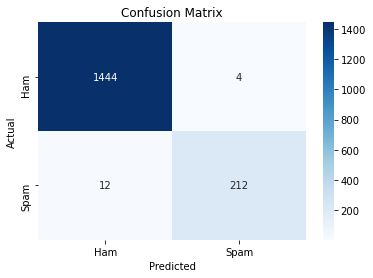

In [31]:
# --- 8. Confusion Matrix Visualization ---
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()